
--- Columns ---
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smo

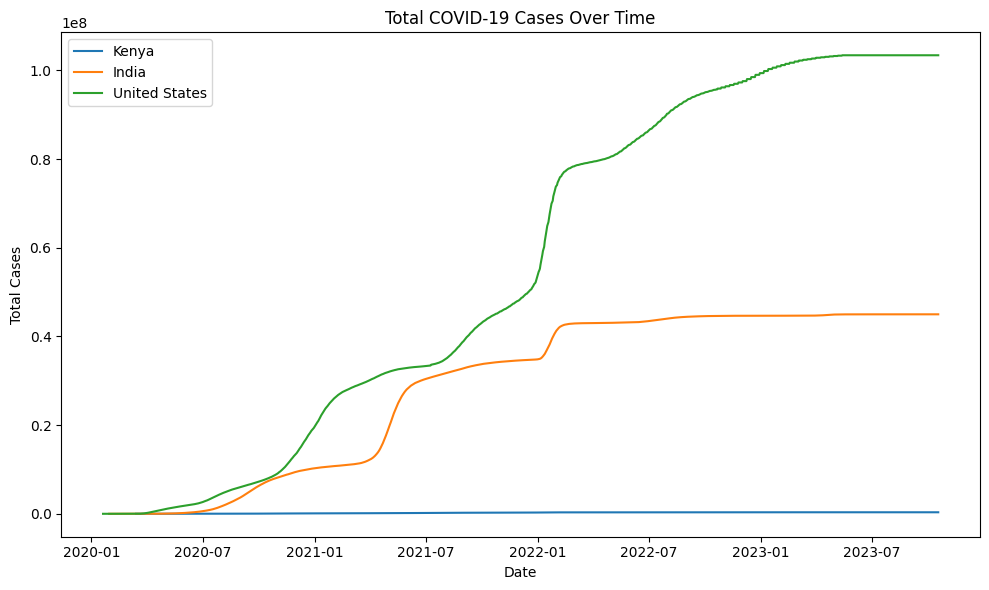

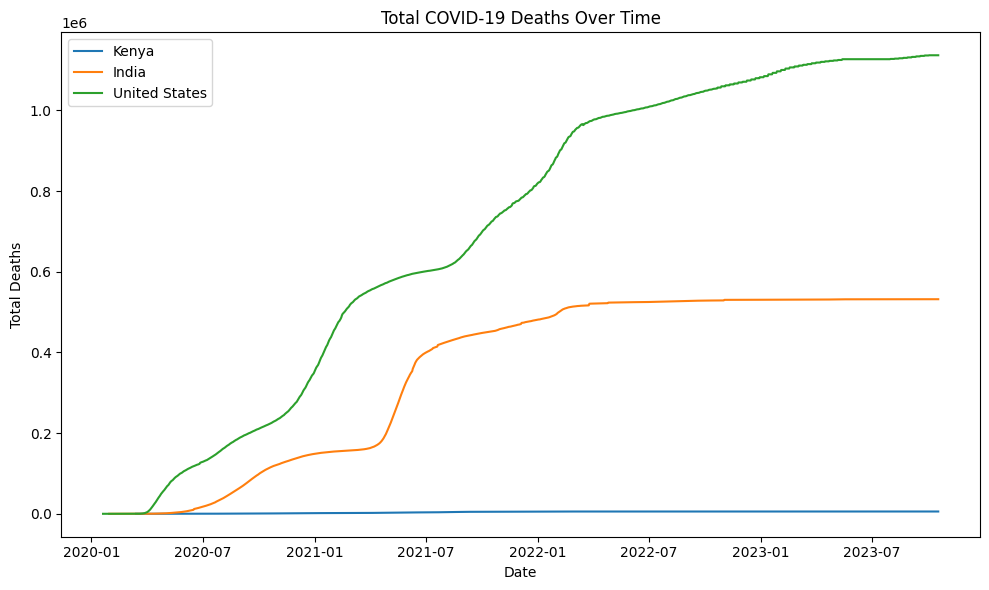

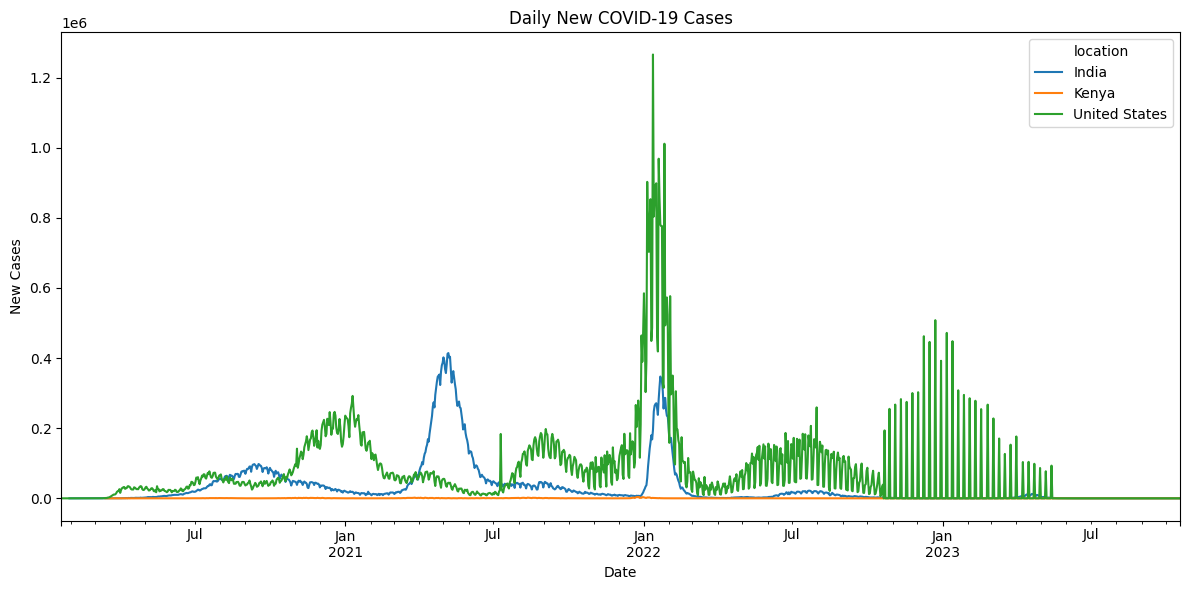

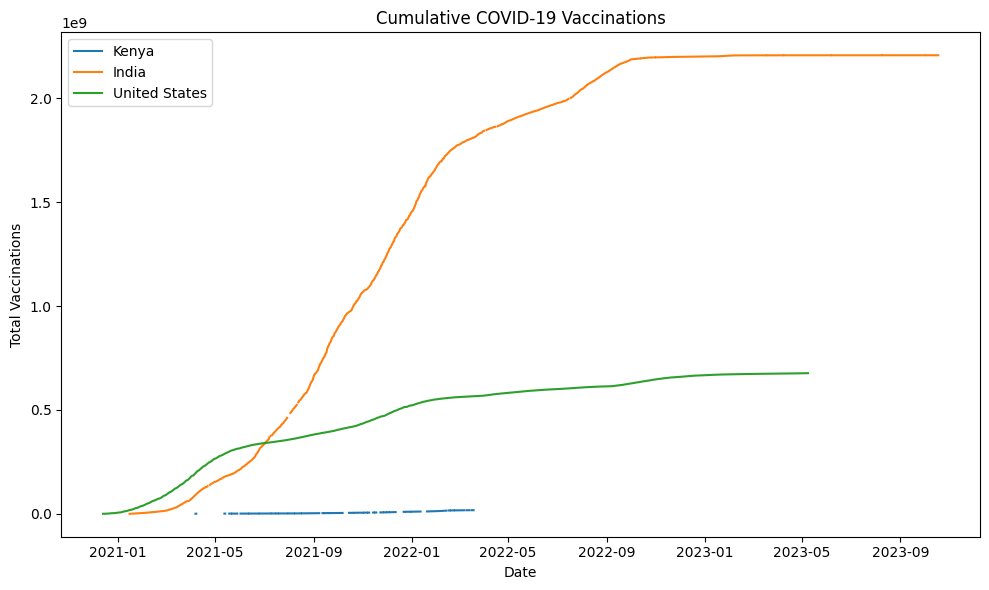

In [1]:
# COVID-19 Data Analysis Project

# Step 1: Import 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 2: Load Data
df = pd.read_csv("owid-covid-data.csv")

# Step 3: Explore Data
print("\n--- Columns ---")
print(df.columns)

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Step 4: Data Cleaning
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]
df = df.dropna(subset=['date', 'total_cases'])
df['date'] = pd.to_datetime(df['date'])
df['total_deaths'] = df['total_deaths'].fillna(0)
df['new_cases'] = df['new_cases'].interpolate()

# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# Compare new cases
df_pivot = df.pivot_table(index='date', columns='location', values='new_cases')
df_pivot.plot(figsize=(12, 6), title="Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()

# Step 6: Visualize Vaccination Progress
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Cumulative COVID-19 Vaccinations")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Optional Choropleth Map
latest = df[df['date'] == df['date'].max()]
choropleth_data = latest[['iso_code', 'location', 'total_cases']].dropna()
fig = px.choropleth(
    choropleth_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases by Country"
)
fig.show()

# Insights (use Markdown cells in the notebook)
# Example Markdown:
# ## Insights
# - The U.S. experienced the highest total number of cases.
# - India showed the most rapid rise in new cases during 2021.
# - Kenya had a lower death rate despite having fewer resources.
# - Vaccination rollouts varied significantly across the three countries.


pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install plotly